In [1]:
!source /etc/profile

import os
import sys
import random
import time
from collections import deque
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, Activation, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import json
import joblib

plt.rcParams["figure.figsize"] = (15,15)

# Check GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# tf.config.list_physical_devices()

Num GPUs Available:  1


2022-02-09 01:01:31.967511: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 01:01:31.975951: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 01:01:31.976568: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
csv_file_1 = "data/formatted/BTCUSDT-1h-data.csv"
csv_file_2 = "data/formatted/ETHUSDT-1h-data.csv"

In [3]:
data1 = pd.read_csv(csv_file_1, skiprows=[0], names=["timestamp", "open", "high", "low", "close", "volume", "rsi", "ema"])
data2 = pd.read_csv(csv_file_2, skiprows=[0], names=["timestamp", "open", "high", "low", "close", "volume", "rsi", "ema"])


data1.set_index("timestamp", inplace=True)
data2.set_index("timestamp", inplace=True)

In [4]:
## Modify Data

for col in ["open", "high", "low", "close", "ema"]:
    data2[col] = [x*15 for x in data2[col].tolist()]

data2["volume"] = [x*.15 for x in data2["volume"].tolist()]

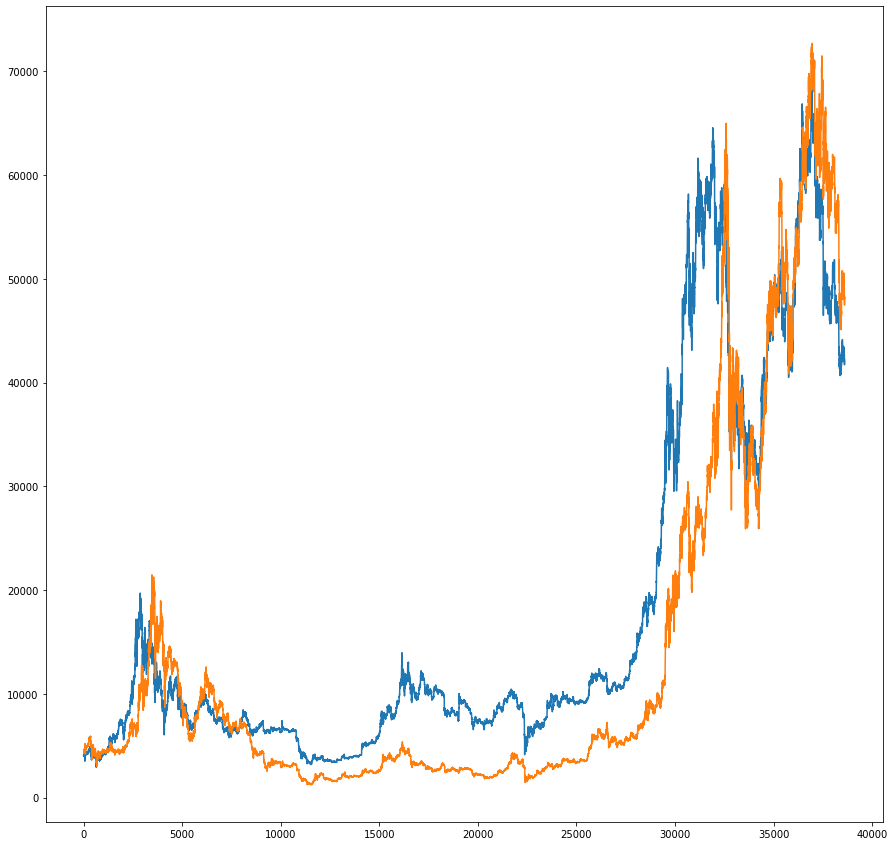

In [5]:
selected_column = "close"

min_len = min(len(data1), len(data2))
x = list(range(min_len))

plt.plot(x, data1[selected_column].tail(min_len))
plt.plot(x, data2[selected_column].tail(min_len))
plt.show()